# Import Libraries

In [1]:
import numpy as np         # For mathematical calculation
import pandas as pd        # For data manupulation
import matplotlib.pyplot as plt   # For data visualization
import seaborn as sns
from sklearn.model_selection import train_test_split   # Split the dataset
from sklearn.linear_model import LinearRegression      # Linear Regression model
from sklearn.metrics import mean_squared_error, r2_score    # Metrics
from mlxtend.feature_selection import SequentialFeatureSelector    # Feature Selection
from sklearn.preprocessing import StandardScaler         # Feature selection

# Load Dataset

In [2]:
data = pd.read_csv("./Data.csv")

In [3]:
data.head(5)

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


# About the dataset

This dataset includes various information like GRE score, TOEFL score, university rating, SOP (Statement of Purpose), LOR (Letter of Recommendation), CGPA, research and chance of admit. In this dataset, 400 entries are included.

- GRE Scores ( out of 340 )
- TOEFL Scores ( out of 120 )
- University Rating ( out of 5 )
- Statement of Purpose (SOP) and Letter of Recommendation (LOR) Strength ( out of 5 )
- Undergraduate GPA ( out of 10 )
- Research Experience ( either 0 or 1 )
- Chance of Admit ( ranging from 0 to 1 )  [This is our target feature.]

In [4]:
# Shape of our dataset

print(data.shape)

(500, 9)


In [5]:
# Information about the dataset

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          500 non-null    int64  
 2   TOEFL Score        500 non-null    int64  
 3   University Rating  500 non-null    int64  
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


In [6]:
value_count = data.apply(pd.Series.nunique).to_frame(name = 'Count').reset_index()

In [7]:
value_count.rename(columns = {'index' : 'Feature'} , inplace = True)

In [8]:
value_count

,Feature,Count
0,Serial No.,500
1,GRE Score,49
2,TOEFL Score,29
3,University Rating,5
4,SOP,9
5,LOR,9
6,CGPA,184
7,Research,2
8,Chance of Admit,61


Our dataset also has no missing values.

There are few features which are categorical specifically ordinal like SOP, LOR, University rating.

In [9]:
data.isnull().sum()

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

# Data Analysis and Preprocessing

The feature Serial No. is no use for us. Therefore, we will remove it.

In [10]:
data.drop('Serial No.', axis = 1 , inplace = True)

In [11]:
data.describe()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


In [12]:
data.columns

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA',
       'Research', 'Chance of Admit '],
      dtype='object')

In [13]:
data.rename( columns = {'LOR ': 'LOR', 'Chance of Admit ': 'Chance of Admit'}, inplace = True)

Correlation between numerical features and target variable.

<AxesSubplot:>

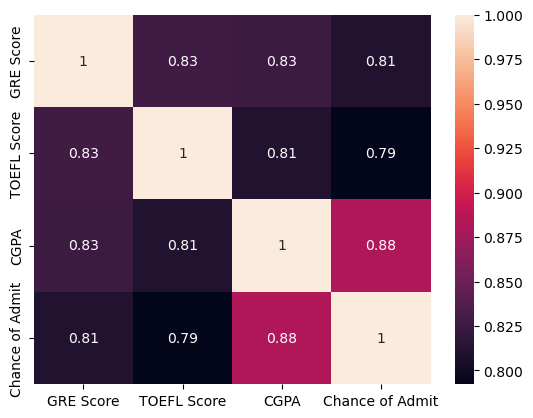

In [14]:
sns.heatmap(data[['GRE Score', 'TOEFL Score', 'CGPA', 'Chance of Admit']].corr(), annot = True)

Few things to notice:
- Correlation between GRE and TOEFL and CGPA is high.

<AxesSubplot:xlabel='Research', ylabel='Chance of Admit'>

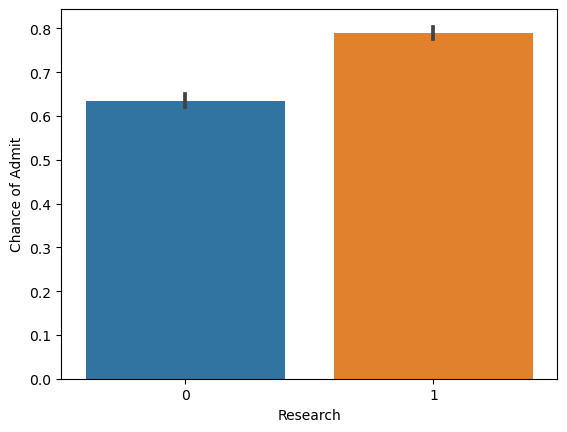

In [15]:
sns.barplot(data = data, x = 'Research', y = 'Chance of Admit')

<AxesSubplot:xlabel='University Rating', ylabel='Chance of Admit'>

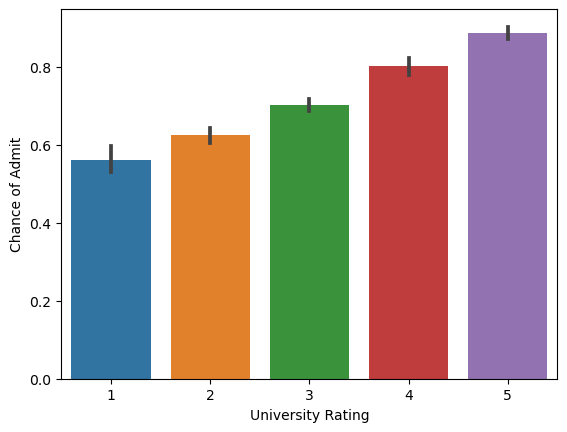

In [16]:
sns.barplot(data = data, x = 'University Rating', y = 'Chance of Admit')

<AxesSubplot:xlabel='SOP', ylabel='Chance of Admit'>

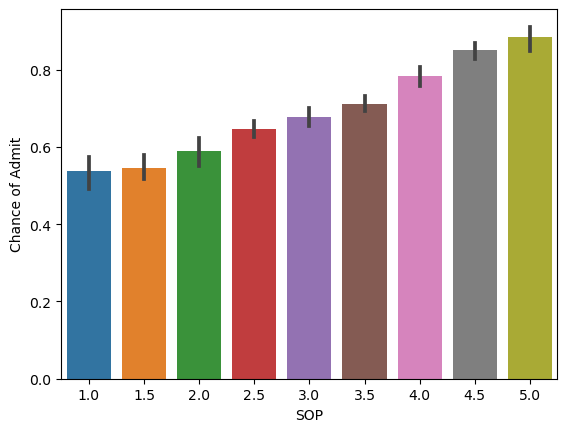

In [17]:
sns.barplot(data = data, x = 'SOP', y = 'Chance of Admit')

<AxesSubplot:xlabel='LOR', ylabel='Chance of Admit'>

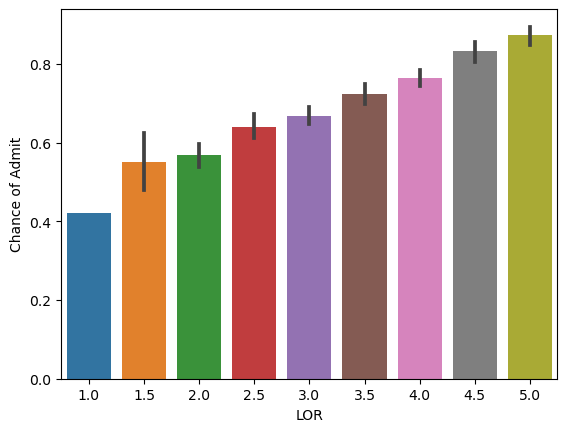

In [18]:
sns.barplot(data = data, x = 'LOR', y = 'Chance of Admit')

In [19]:
data.columns

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR', 'CGPA',
       'Research', 'Chance of Admit'],
      dtype='object')

In [20]:
gre = data[['GRE Score']]

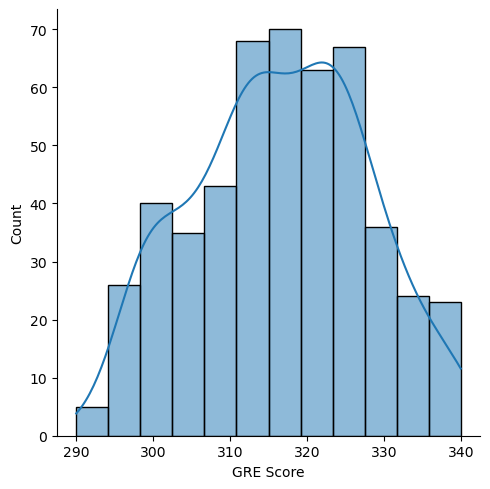

In [21]:
sns.displot(data, x = 'GRE Score', kde = 'True')

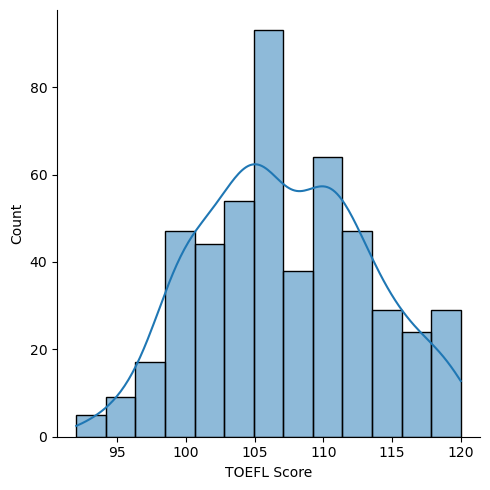

In [22]:
sns.displot(data, x = 'TOEFL Score', kde = 'True')

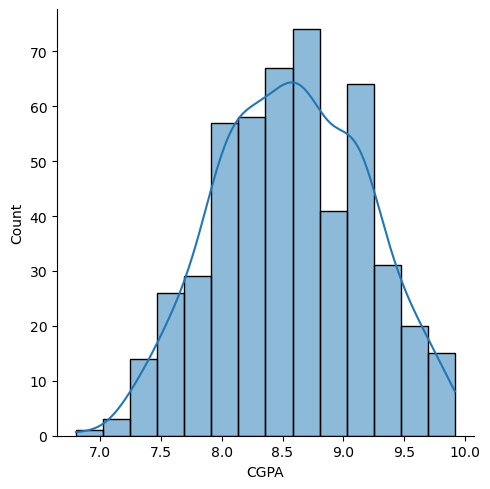

In [23]:
sns.displot(data, x = 'CGPA', kde = 'True')

We can see all the three continuous features are normally distributed.

<AxesSubplot:xlabel='University Rating', ylabel='count'>

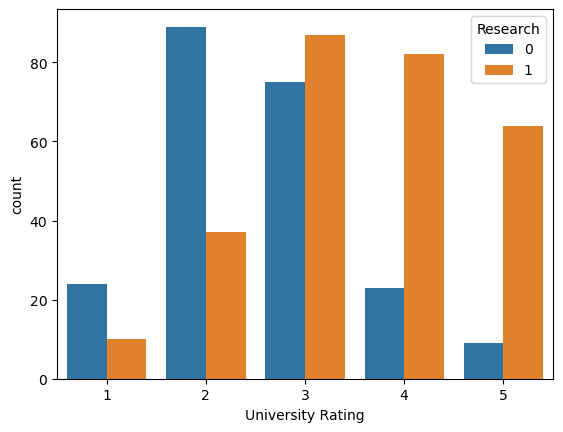

In [24]:
sns.countplot(data = data, x = 'University Rating', hue = 'Research')

<AxesSubplot:xlabel='SOP', ylabel='count'>

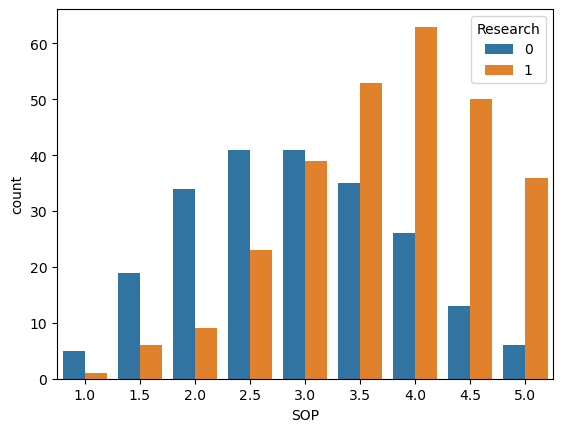

In [25]:
sns.countplot(data = data, x = 'SOP', hue = 'Research')

<AxesSubplot:xlabel='LOR', ylabel='count'>

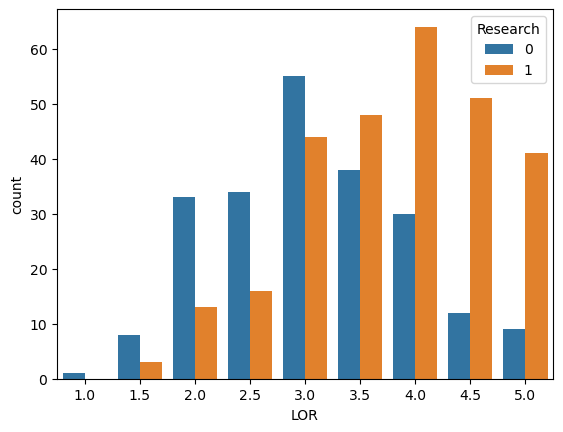

In [26]:
sns.countplot(data = data, x = 'LOR', hue = 'Research')

<AxesSubplot:xlabel='Research', ylabel='count'>

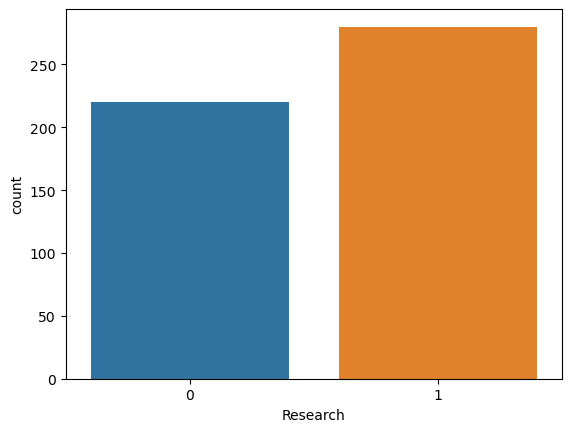

In [27]:
sns.countplot(data = data, x = 'Research')

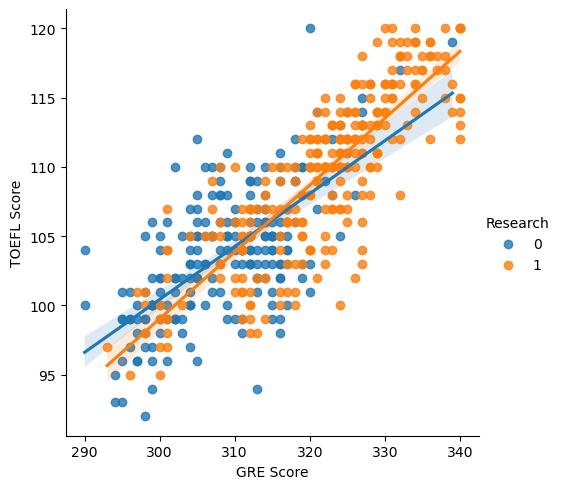

In [28]:
sns.lmplot(data=data, x="GRE Score", y="TOEFL Score", hue= 'Research')

# Linear Regression Without Feature Scaling

In [29]:
x = data.drop('Chance of Admit', axis = 1)
y = data['Chance of Admit']

In [30]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

In [31]:
lr = LinearRegression().fit(x_train, y_train)

In [32]:
lr.coef_

array([0.00243444, 0.00299587, 0.0025688 , 0.00181369, 0.01723798,
       0.11252708, 0.02402679])

In [33]:
lr.intercept_

-1.4214470719016474

In [34]:
y_pred = lr.predict(x_test)

In [35]:
train_mse = mean_squared_error(y_train, lr.predict(x_train))
test_mse  = mean_squared_error(y_test, y_pred)
print(train_mse)
print(test_mse)

0.003526555478455756
0.003704655398788412


In [36]:
train_r2 = r2_score(y_train, lr.predict(x_train))
test_r2 = r2_score(y_test, y_pred)
print(train_r2)
print(test_r2)

0.8210671369321555
0.8188432567829628


### Using different combinations of the features

In [37]:
column = x.columns
column

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR', 'CGPA',
       'Research'],
      dtype='object')

In [38]:
# R2 and Adjusted R2

x_train_r2 = pd.DataFrame()
x_test_r2 = pd.DataFrame()
feature = []
Train_r2 = []
Test_r2 = []
Train_adjr2 = []
Test_adjr2 = []
for i in range(len(column)):
    x_train_r2[column[i]] = x_train[column[i]]
    x_test_r2[column[i]] = x_test[column[i]]
    lr = LinearRegression().fit(x_train_r2, y_train)
    feature.append([column[0:i+1]])
    train_r2 = r2_score(y_train, lr.predict(x_train_r2))
    test_r2 = r2_score(y_test, lr.predict(x_test_r2))
    Train_r2.append(train_r2)
    Test_r2.append(test_r2)
    train_adjr2 = 1- ((1-train_r2) * (400-1)/(400-(i+1)-1))
    test_adjr2 = 1- ((1-test_r2) * (100-1)/(100-(i+1)-1))
    Train_adjr2.append(train_adjr2)
    Test_adjr2.append(test_adjr2)
    
Result_df = pd.DataFrame({'Feature': feature, 'Train R2': Train_r2, 'Test R2': Test_r2, 'Train AdjR2': Train_adjr2, 'Test AdjR2': Test_adjr2})
Result_df

,Feature,Train R2,Test R2,Train AdjR2,Test AdjR2
0,[[GRE Score]],0.673236,0.586097,0.672415,0.581873
1,"[[GRE Score, TOEFL Score]]",0.715472,0.652113,0.714039,0.644940
2,"[[GRE Score, TOEFL Score, University Rating]]",0.736694,0.712252,0.734699,0.703259
3,"[[GRE Score, TOEFL Score, University Rating, S...",0.748386,0.722051,0.745838,0.710348
4,"[[GRE Score, TOEFL Score, University Rating, S...",0.766367,0.738503,0.763402,0.724594
5,"[[GRE Score, TOEFL Score, University Rating, S...",0.816302,0.812665,0.813497,0.800579
6,"[[GRE Score, TOEFL Score, University Rating, S...",0.821067,0.818843,0.817872,0.805060


Here, We see that all the features play a important role in the prediction of the target feature.

Text(0, 0.5, 'Score')

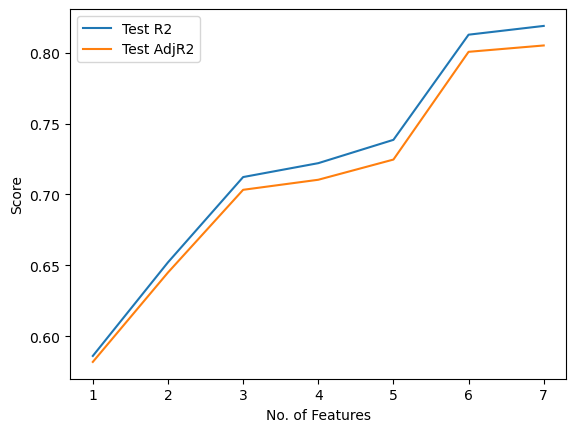

In [39]:
sns.lineplot(x = range(1, len(column)+1), y = Result_df['Test R2'])
sns.lineplot(x = range(1, len(column)+1), y = Result_df['Test AdjR2'] )
plt.legend(labels = ['Test R2', 'Test AdjR2'])
plt.xlabel('No. of Features')
plt.ylabel('Score')

In [40]:
# Forward Feature Selection

sfs = SequentialFeatureSelector(lr, k_features = 'best', forward = True,  n_jobs = -1)
sfs.fit(x_train, y_train)

SequentialFeatureSelector(estimator=LinearRegression(), k_features=(1, 7),
                          n_jobs=-1, scoring='r2')

In [41]:
features = list(sfs.k_feature_names_)
features

['GRE Score', 'TOEFL Score', 'LOR', 'CGPA', 'Research']

In [42]:
lr_fs = LinearRegression().fit(x_train[['GRE Score', 'TOEFL Score', 'University Rating','LOR', 'CGPA', 'Research']], y_train)

In [43]:
y_pred = lr_fs.predict(x_test[['GRE Score', 'TOEFL Score', 'University Rating','LOR', 'CGPA', 'Research']])
print(r2_score(y_train, lr_fs.predict(x_train[['GRE Score', 'TOEFL Score', 'University Rating','LOR', 'CGPA', 'Research']])))
print(r2_score(y_test, y_pred))

0.8210089089613841
0.8188034102531081


In [44]:
print('The best accuracy we can get is: ', r2_score(y_test, y_pred))

The best accuracy we can get is:  0.8188034102531081


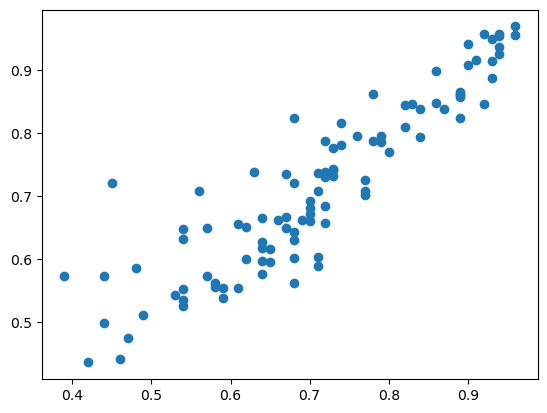

In [45]:
plt.scatter(y_test, y_pred)

In [46]:
residuals = y_test-y_pred

Text(0.5, 1.0, 'Residual Plot')

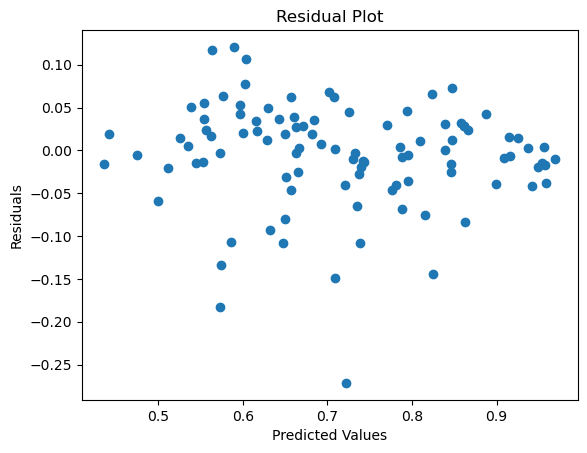

In [47]:
plt.scatter(y_pred, residuals)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')

In [48]:
rms=np.sqrt(mean_squared_error(y_test, y_pred))
round(rms, 3)

0.061

# Linear Regression with feature scaling

In [49]:
columns = x_train.columns
columns

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR', 'CGPA',
       'Research'],
      dtype='object')

In [50]:
for i in ['GRE Score', 'TOEFL Score', 'CGPA']:
    trans = StandardScaler()
    x_train[i] = trans.fit_transform(x_train[[i]])
    x_test[i] = trans.transform(x_test[[i]])
    

In [51]:
lr = LinearRegression().fit(x_train, y_train)

In [52]:
y_pred = lr.predict(x_test)

In [53]:
print(r2_score(y_train, lr.predict(x_train)))
print(r2_score(y_test, y_pred))

0.8210671369321554
0.8188432567829628


In [54]:
rms=np.sqrt(mean_squared_error(y_test, y_pred))
round(rms, 3)

0.061

Feature Scaling doing no good to improve our linear regression model.

# Decision Tree Regressor

In [55]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ShuffleSplit

In [56]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.20, random_state = 42)

In [57]:
dr = DecisionTreeRegressor().fit(x_train, y_train)

In [58]:
y_pred = dr.predict(x_test)

In [59]:
print(r2_score(y_train, dr.predict(x_train)))
print(r2_score(y_test, y_pred))

1.0
0.5880684596577018


In [60]:
rms=np.sqrt(mean_squared_error(y_test, y_pred))
round(rms, 3)

0.092

This is showing that our model is prone to overfitting. We to solve this problem.

### Hyperparameter Tuning

In [61]:
parameters={"splitter":["best","random"],
            "max_depth" : [1,3,5,7,9,11,12],
            "min_samples_leaf":[1,2,3,4,5,6,7,8,9,10],
            "min_weight_fraction_leaf":[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9],
            "max_features":["auto","log2","sqrt",None],
            "max_leaf_nodes":[10,20,30,40,50,60,70,80,90] }

In [62]:
ss = ShuffleSplit(n_splits = 5, test_size = 0.20, random_state = 42)

In [63]:
tuning_model = GridSearchCV(dr, param_grid={ "max_depth" : [1,3,5,7,9,11,12], "min_samples_leaf":[1,2,3,4,5,6,7,8,9,10], "splitter":["best","random"] }, scoring='neg_mean_squared_error', cv = ss, verbose=1)

In [64]:
tuning_model.fit(x_train, y_train)
print("Done")

Fitting 5 folds for each of 140 candidates, totalling 700 fits
Done


In [65]:
tuning_model.best_params_

{'max_depth': 11, 'min_samples_leaf': 9, 'splitter': 'best'}

In [66]:
dr = DecisionTreeRegressor(max_depth=  8, max_leaf_nodes = 20,  min_samples_leaf= 10, splitter = 'best').fit(x_train, y_train)

In [67]:
print(r2_score(y_train, dr.predict(x_train)))

0.8392164867046901


In [68]:
print(r2_score(y_test, dr.predict(x_test)))
y_pred = dr.predict(x_test)

0.7644831446903149


In [69]:
rms=np.sqrt(mean_squared_error(y_test, y_pred))
round(rms, 3)

0.069

Here, we can see that we have remove the overfitting fro ovr model.

### KNN

In [70]:
from sklearn.neighbors import KNeighborsRegressor


In [71]:
for i in ['GRE Score', 'TOEFL Score', 'CGPA']:
    trans = StandardScaler()
    x_train[i] = trans.fit_transform(x_train[[i]])
    x_test[i] = trans.transform(x_test[[i]])

In [72]:
kn = KNeighborsRegressor().fit(x_train, y_train)

In [73]:
print(r2_score(y_train, kn.predict(x_train)))
print(r2_score(y_test, kn.predict(x_test)))

0.8546625271915862
0.7984273838630808


In [74]:
parameters = { 'n_neighbors': [3, 5, 7, 9, 11], 'weights': ['uniform','distance'], 'metric' : ['minkowski', 'euclidean'] }

In [75]:
tuning_model = GridSearchCV(kn, param_grid = parameters, cv = ss, verbose = 1)

In [76]:
tuning_model.fit(x_train, y_train)
'Done'

Fitting 5 folds for each of 20 candidates, totalling 100 fits


'Done'

In [77]:
tuning_model.best_params_

{'metric': 'minkowski', 'n_neighbors': 7, 'weights': 'distance'}

In [78]:
kn = KNeighborsRegressor(metric = 'euclidean', n_neighbors = 11, weights = 'uniform').fit(x_train, y_train)

In [79]:
print(r2_score(y_train, kn.predict(x_train)))
print(r2_score(y_test, kn.predict(x_test)))
y_pred = kn.predict(x_test)

0.8201681866459987
0.8051773121299683


In [80]:
rms=np.sqrt(mean_squared_error(y_test, y_pred))
round(rms, 3)

0.063

In [85]:
final_result = pd.DataFrame({'Algorithms':['Linear Regression','Decision Tree', 'KNN'], 'RMS':[0.061, 0.069, 0.063]})

In [90]:
final_result.style.background_gradient(cmap="RdYlGn")

,Algorithms,RMS
0,Linear Regression,0.061000
1,Decision Tree,0.069000
2,KNN,0.063000
